<a href="https://colab.research.google.com/github/2303A52183/2303a52183-GEN-AI-2025/blob/main/Gen_ai_ass_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7141 - loss: 0.5821 - val_accuracy: 0.7281 - val_loss: 0.5419
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7401 - loss: 0.5276 - val_accuracy: 0.7250 - val_loss: 0.5372
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7373 - loss: 0.5263 - val_accuracy: 0.7406 - val_loss: 0.5320
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7705 - loss: 0.4918 - val_accuracy: 0.7469 - val_loss: 0.5329
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7438 - loss: 0.5164 - val_accuracy: 0.7281 - val_loss: 0.5343
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7533 - loss: 0.5067 - val_accuracy: 0.7312 - val_loss: 0.5315
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7692 - loss: 0.5069 - val_accuracy: 0.7281 - val_loss: 0.5265
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7461 - loss: 0.5152 - val_accuracy: 0.7312 - val_loss: 0.

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       141
           1       0.78      0.77      0.78       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Model saved as wine_quality_ann.h5


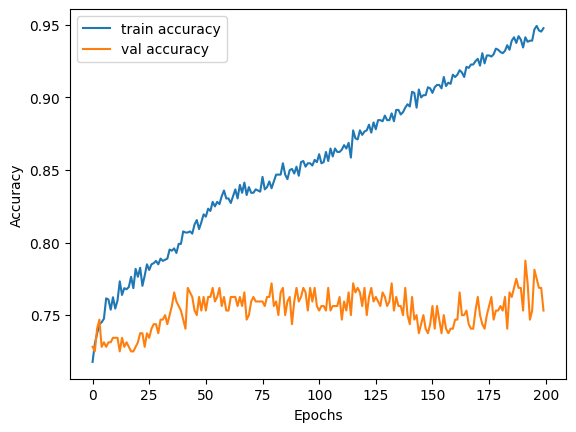

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
dataset_path = "/content/winequality-red.csv"
df = pd.read_csv(dataset_path)

# Check for missing values
df = df.dropna()

# Separate features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert target variable to binary classification (good/bad quality)
threshold = 6  # Wine quality >= 6 is considered good (1), otherwise bad (0)
y = (y >= threshold).astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(24, activation='tanh'),
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix and classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model
model.save("wine_quality_ann.h5")
print("Model saved as wine_quality_ann.h5")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
